<a href="https://colab.research.google.com/github/StephenMartino4/Computational-Physics/blob/main/Stephen_Martino_Lab05_Part1__Simple_Harmonic_Motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5, Part 1: Collect Data and Plot Solution

* In the first part of this week's lab, we will collect data for the position of a mass oscillating on a spring as a function of time.

* The general solution to describe the motion of a mass oscillating on a spring is
$$ x(t) = A cos(\omega t - \phi) $$

* Describe the meaning of each term in the table below: (2 points)

| Symbol | Name |Units | Description |
|----------|----|------|-----|
| x        | position | m | position of mass |
| A        |  amplitude  | m | max displacement from equilibrium |
| $\omega$ |  omega  | radians/s | net change in angle over time |
| $\phi$   |  phi  | radians/m | phase constant |

## 0. Import modules

In the cell below, import numpy and matplotlib

In [ ]:
# import your modules here
from matplotlib import pyplot as plt
import numpy as np

## 1. Collecting Your Data

* Obtain some position vs. time data for a simple harmonic oscillator (mass on spring).

### Procedure

(3 pts)

* Briefly describe the procedure you used to set up your system and collect your data.  
* Take a picture of your experimental setup and upload it here.
##The picture is on my wiki page

**Your Answer Here**
We gathered a ring stand and a spring. We hung the spring from the stand over the edge of the table, attaching a 100 gram weight to the spring. We put the motion sensor on the floor directly below the weight. The sensor was connected to the laptop via bluetooth. By pulling on the spring, we could begin the data collection into the software that generated a graph and CSV for us.

## 2. Upload Data Into Colab

(2 points)

* In the bottom left of your window, click on the `<>` icon to access `Code snippets`.

* Select `Open files from your local file system`, then `Insert`.

* Select your data files to upload, and upload them.



In [ ]:
# upload your data
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name = fn, length =len(uploaded[fn])))

Saving Comp Lab 5 SHM.csv to Comp Lab 5 SHM (1).csv
User uploaded file "Comp Lab 5 SHM (1).csv" with length 8804 bytes


In [ ]:
# use astropy to read in your data file
from astropy.table import Table
data = Table.read("Comp Lab 5 SHM.csv")

* Save the time and position variables as more conveniently named arrays
* Subtract the average from the position

In [ ]:
# save the time and position data
time = data["Data Set 5:Time(s)"]
position = data["Data Set 5:Position(m)"]

# subtract the mean of the position from the position
new_position = position - np.mean(position)

## 3. Visualize and Analyze Your Data

(5 points)

### Plot Your Data
* Make a plot of position vs. time using python.

Text(0.5, 1.0, 'Time vs Position')

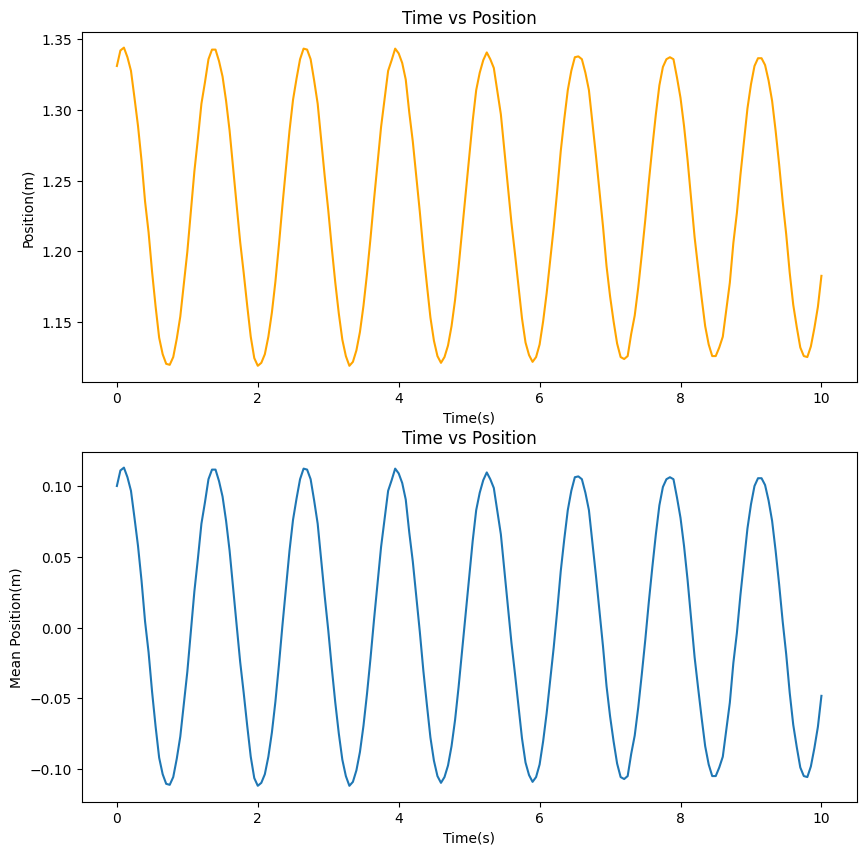

In [ ]:
# code to plot your position vs time data here
plt.figure(figsize= (10,10))
plt.subplot(2,1,1)
plt.xlabel("Time(s)")
plt.ylabel("Position(m)")
plt.plot(time,position,color='orange')
plt.title("Time vs Position")
plt.subplot(2,1,2)
plt.plot(time,new_position)
plt.xlabel("Time(s)")
plt.ylabel("Mean Position(m)")
plt.title("Time vs Position")

### Determine Parameters of Analytic Solution



* From your plot of position vs time, you should be to estimate the amplitude $A$ and the period $T$ of the motion.

* Briefly describe how you measured these values, and enter your values in the cell below.



In [ ]:
# values of period and amplitude from the graph
A = 0.11 # amplitude in m
T = 1.3# period in sec

We analysed the graph and determined the best A and T values. We noted around 7.7 oscilations in 10 seconds, yielding 1.3 second period

#### Calculate $\omega$

In the cell below, calculate $\omega$ from your measured value of the period.

In [ ]:
# calculate omega
omega = (2*np.pi) /T
omega

4.83321946706122

#### Plot data and Analytic Solution

(5 points)

* copy your code for plotting the position versus time
* add code to overplot the analytic solution

* Determine the best value of $\phi$ using trial and error.


In [ ]:
# write a function to calculate the position of the SHO
# input = A, omega, phi, t
# return = position
def calc_position(A,omega,phi,t):
  position = A*np.cos(omega*t-phi)
  return position

Text(0.5, 1.0, 'Time vs Position')

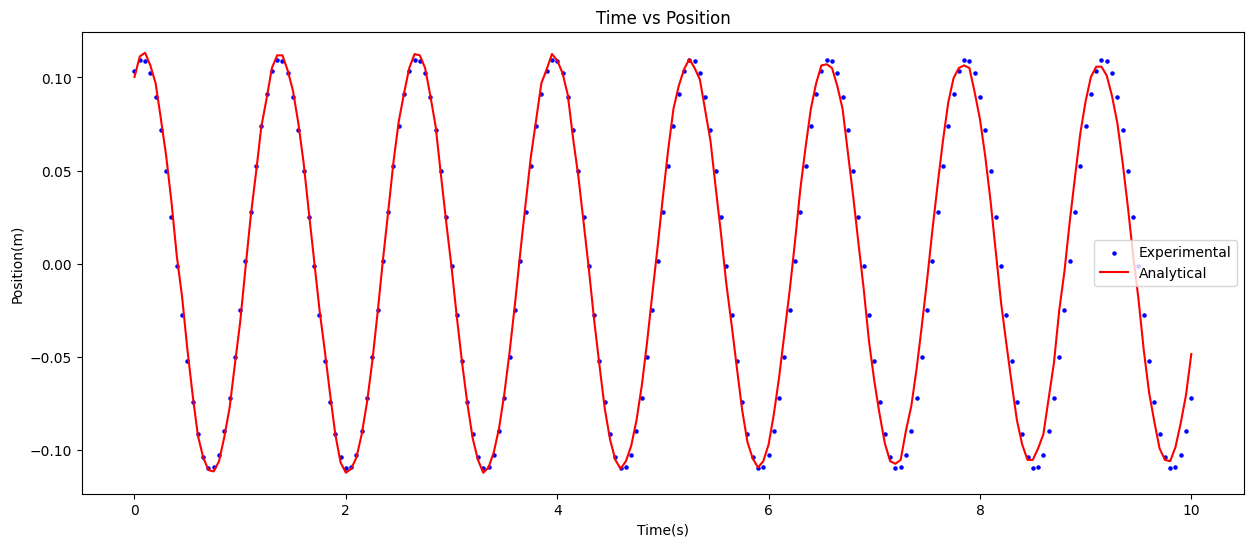

In [ ]:
# enter your code to plot your data and analytic solution
# be sure to use your function
plt.figure(figsize = (15,6))
myPos = calc_position(A, omega, 0.35, time)
plt.scatter(time,myPos,5,color = 'blue',label="Experimental")
plt.plot(time,new_position,color = 'red',label="Analytical")
plt.legend()
plt.xlabel("Time(s)")
plt.ylabel("Position(m)")
plt.title("Time vs Position")

#### Calculate the spring constant and intial conditions

(3 points)

From your fit, and anything else you need to measure, determine:
* the spring constant, $k$
* the initial position, $x_0$
* the initial velocity, $v_{x0}$


In [ ]:
# calculate spring constant
m = 0.1 #kilograms
k = (omega**2)*m
k

2.3360010416779544

In [ ]:
# calculate intial position here
x0 = calc_position(A,omega, 0.35,0)
x0

0.10333099841321168

In [ ]:
# calculate the intial velocity here
def calc_initial_vel(A,omega,phi,t):
  v0 = -A*omega*np.sin(omega*t-phi)
  return v0

In [ ]:
vx0 = calc_initial_vel(A,omega,0.35,0)
vx0

0.1823030394026927